# Relative Serial Position Curve

Compute recall accuracy relative to the previous item.

The relative serial position curve (RSPC) counts a recall as correct when it immediately follows its predecessor in the study list. This notebook demonstrates computing RSPC scores and plotting the curve for a small synthetic dataset.

In [1]:
import os

from jax import jit

from jaxcmr.helpers import find_project_root, generate_trial_mask, load_data
from jaxcmr.analyses.rspc import relative_spc, plot_relative_spc


<Axes: xlabel='Study Position', ylabel='Recall Rate'>

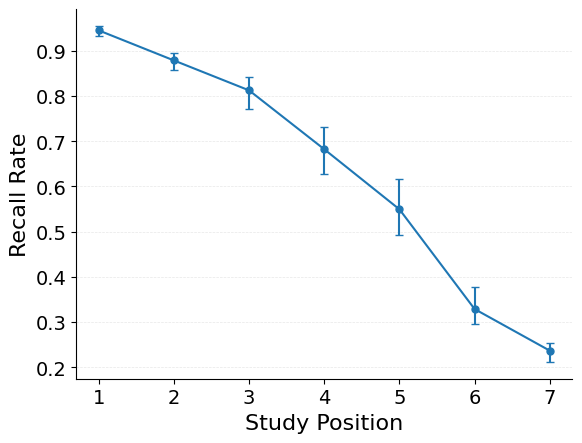

In [2]:
run_tag = "RepCRP"
data_name = "Gordon2021"
data_query = "data['condition'] == 2"
data_path = os.path.join(find_project_root(), "data/Gordon2021.h5")

# set up data structures
data = load_data(data_path)
recalls = data["recalls"]
presentations = data["pres_itemnos"]
list_length = data["listLength"][0].item()
trial_mask = generate_trial_mask(data, data_query)

# plot SPC
plot_relative_spc(data, trial_mask)


Array([0.21666667, 0.2547619 , 0.15476191, 0.1       , 0.08333334,
       0.09047619, 0.07142857, 0.06190477, 0.04761905, 0.04285714,
       0.05714286, 0.0452381 , 0.04761905, 0.06666667, 0.04761905,
       0.04761905, 0.06904762, 0.05      , 0.05476191, 0.04047619,
       0.05714286, 0.04761905, 0.02619048, 0.0452381 , 0.06666667,
       0.05      , 0.06904762, 0.05476191, 0.0452381 , 0.06190477,
       0.06428572, 0.04285714, 0.05      , 0.04761905, 0.05952381,
       0.0452381 , 0.06666667, 0.05952381, 0.07857143, 0.0952381 ],      dtype=float32)

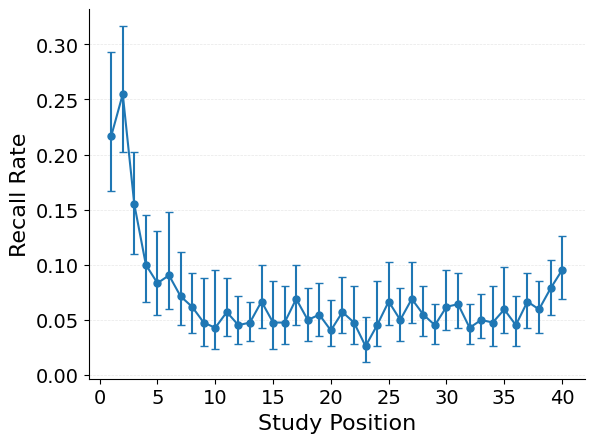

In [3]:
# parameters
run_tag = "SPC"
data_name = "LohnasKahana2014"
data_query = "data['list_type'] == 1"
data_path = os.path.join(find_project_root(), "data/LohnasKahana2014.h5")

# set up data structures
data = load_data(data_path)
recalls = data["recalls"]
presentations = data["pres_itemnos"]
list_length = data["listLength"][0].item()
trial_mask = generate_trial_mask(data, data_query)

# plot SPC
plot_relative_spc(data, trial_mask)
jit(relative_spc, static_argnames=("size", "list_length"))(
    recalls[trial_mask], presentations[trial_mask], list_length
)